In [137]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [150]:
data=pd.read_csv('product_info.csv')
data.head()


,product_id,product_name,brand_id,brand_name,loves_count,rating,reviews,size,variation_type,variation_value,...,online_only,out_of_stock,sephora_exclusive,highlights,primary_category,secondary_category,tertiary_category,child_count,child_max_price,child_min_price
0,P473671,Fragrance Discovery Set,6342,19-69,6320,3.6364,11.0,NaN,NaN,NaN,...,1,0,0,"['Unisex/ Genderless Scent', 'Warm &Spicy Scen...",Fragrance,Value & Gift Sets,Perfume Gift Sets,0,NaN,NaN
1,P473668,La Habana Eau de Parfum,6342,19-69,3827,4.1538,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,85.0,30.0
2,P473662,Rainbow Bar Eau de Parfum,6342,19-69,3253,4.2500,16.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
3,P473660,Kasbah Eau de Parfum,6342,19-69,3018,4.4762,21.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0
4,P473658,Purple Haze Eau de Parfum,6342,19-69,2691,3.2308,13.0,3.4 oz/ 100 mL,Size + Concentration + Formulation,3.4 oz/ 100 mL,...,1,0,0,"['Unisex/ Genderless Scent', 'Layerable Scent'...",Fragrance,Women,Perfume,2,75.0,30.0


In [139]:
data.columns

Index(['product_id', 'product_name', 'brand_id', 'brand_name', 'loves_count',
       'rating', 'reviews', 'size', 'variation_type', 'variation_value',
       'variation_desc', 'ingredients', 'price_usd', 'value_price_usd',
       'sale_price_usd', 'limited_edition', 'new', 'online_only',
       'out_of_stock', 'sephora_exclusive', 'highlights', 'primary_category',
       'secondary_category', 'tertiary_category', 'child_count',
       'child_max_price', 'child_min_price'],
      dtype='object')

In [162]:
print(data.describe())  # Summary statistics of numerical columns

          brand_id   loves_count       rating       reviews    price_usd  \
count  8494.000000  8.494000e+03  8216.000000   8216.000000  8494.000000   
mean   5422.440546  2.917957e+04     4.194513    448.545521    51.655595   
std    1709.595957  6.609212e+04     0.516694   1101.982529    53.669234   
min    1063.000000  0.000000e+00     1.000000      1.000000     3.000000   
25%    5333.000000  3.758000e+03     3.981725     26.000000    25.000000   
50%    6157.500000  9.880000e+03     4.289350    122.000000    35.000000   
75%    6328.000000  2.684125e+04     4.530525    418.000000    58.000000   
max    8020.000000  1.401068e+06     5.000000  21281.000000  1900.000000   

       value_price_usd  sale_price_usd  limited_edition          new  \
count       451.000000      270.000000      8494.000000  8494.000000   
mean         91.168537       20.207889         0.070285     0.071698   
std          79.195631       24.327352         0.255642     0.258002   
min           0.000000     

In [140]:
data.isnull().sum()    #عدد القيم المفقودة بكل عمود

product_id               0
product_name             0
brand_id                 0
brand_name               0
loves_count              0
rating                 278
reviews                278
size                  1631
variation_type        1444
variation_value       1598
variation_desc        7244
ingredients            945
price_usd                0
value_price_usd       8043
sale_price_usd        8224
limited_edition          0
new                      0
online_only              0
out_of_stock             0
sephora_exclusive        0
highlights            2207
primary_category         0
secondary_category       8
tertiary_category      990
child_count              0
child_max_price       5740
child_min_price       5740
dtype: int64

In [141]:
data_drop=['brand_id','reviews','variation_type','variation_value','variation_desc','value_price_usd','highlights','sale_price_usd','sale_price_usd',
           'sephora_exclusive','tertiary_category' ,'child_count','child_max_price','child_min_price']
data=data.drop(columns=data_drop)

In [142]:
data.isnull().sum()    #عدد القيم المفقودة بكل عمود

product_id               0
product_name             0
brand_name               0
loves_count              0
rating                 278
size                  1631
ingredients            945
price_usd                0
limited_edition          0
new                      0
online_only              0
out_of_stock             0
primary_category         0
secondary_category       8
dtype: int64

In [179]:
data['size'].isnull().mean()

0.19201789498469507

In [148]:
data.isnull().sum()    #عدد القيم المفقودة بكل عمود

product_id            0
product_name          0
brand_name            0
loves_count           0
rating                0
size                  0
ingredients           0
price_usd             0
limited_edition       0
new                   0
online_only           0
sold_out              0
primary_category      0
secondary_category    0
dtype: int64

In [143]:
data.drop(data[(data['price_usd']<0)].index,inplace=True)

In [144]:
data.rename(columns={"out_of_stock":"sold_out"}, inplace=True)
data.columns

Index(['product_id', 'product_name', 'brand_name', 'loves_count', 'rating',
       'size', 'ingredients', 'price_usd', 'limited_edition', 'new',
       'online_only', 'sold_out', 'primary_category', 'secondary_category'],
      dtype='object')

In [145]:
 df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   product_name        0 non-null      object 
 1   brand_name          0 non-null      object 
 2   loves_count         0 non-null      int64  
 3   rating              0 non-null      float64
 4   reviews             0 non-null      float64
 5   size                0 non-null      object 
 6   variation_type      0 non-null      object 
 7   variation_value     0 non-null      object 
 8   variation_desc      0 non-null      object 
 9   ingredients         0 non-null      object 
 10  price_usd           0 non-null      float64
 11  value_price_usd     0 non-null      float64
 12  sale_price_usd      0 non-null      float64
 13  limited_edition     0 non-null      int64  
 14  new                 0 non-null      int64  
 15  online_only         0 non-null      int64  
 16  sold_out            

In [146]:
data = data.dropna()  # Drop rows with any missing values
data

,product_id,product_name,brand_name,loves_count,rating,size,ingredients,price_usd,limited_edition,new,online_only,sold_out,primary_category,secondary_category
1,P473668,La Habana Eau de Parfum,19-69,3827,4.1538,3.4 oz/ 100 mL,"['Alcohol Denat. (SD Alcohol 39C), Parfum (Fra...",195.0,0,0,1,0,Fragrance,Women
2,P473662,Rainbow Bar Eau de Parfum,19-69,3253,4.2500,3.4 oz/ 100 mL,"['Alcohol Denat. (SD Alcohol 39C), Parfum (Fra...",195.0,0,0,1,0,Fragrance,Women
3,P473660,Kasbah Eau de Parfum,19-69,3018,4.4762,3.4 oz/ 100 mL,"['Alcohol Denat. (SD Alcohol 39C), Parfum (Fra...",195.0,0,0,1,0,Fragrance,Women
4,P473658,Purple Haze Eau de Parfum,19-69,2691,3.2308,3.4 oz/ 100 mL,"['Alcohol Denat. (SD Alcohol 39C), Parfum (Fra...",195.0,0,0,1,0,Fragrance,Women
5,P473661,Kasbah Eau de Parfum Travel Spray,19-69,2448,4.4762,0.25 oz/ 7.5 mL,"['Alcohol Denat. (SD Alcohol 39C), Parfum (Fra...",30.0,0,0,1,0,Fragrance,Women
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8481,P383083,L’Homme Parfum Intense,Yves Saint Laurent,4369,4.5795,3.3 oz/ 100 mL,"['Alcohol, Aqua / Water, Parfum / Fragrance, B...",110.0,0,0,0,1,Fragrance,Men
8483,P460446,L'Homme Le Parfum,Yves Saint Laurent,3812,5.0000,3.3 oz/ 100 mL,"['Alcohol, Aqua / Water, Parfum / Fragrance, L...",148.0,0,0,0,0,Fragrance,Men
8484,P467660,Mascara Volume Effet Faux Cils Radical,Yves Saint Laurent,3489,4.0192,0.25 oz/ 7.5 ml,"['Aqua/Water, Paraffin, Stearic Acid, Copernic...",29.0,0,0,0,0,Makeup,Eye
8486,P457262,Y Eau Fraiche,Yves Saint Laurent,3089,4.7333,3.4 oz/ 100 mL,"['Alcohol, Parfum / Fragrance, Aqua / Water, L...",99.0,0,0,0,1,Fragrance,Men


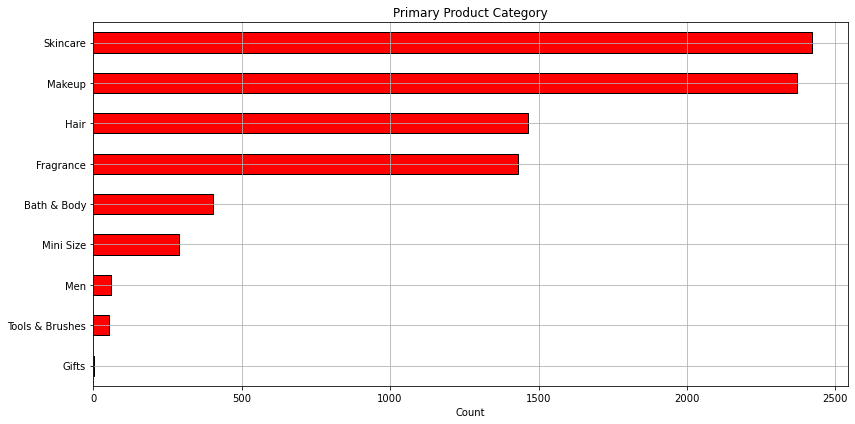

In [180]:
#visulation
plt.figure(figsize=(12, 6))

data['primary_category'].value_counts().iloc[::-1].plot(kind='barh', color='red', edgecolor='black')

plt.title('Primary Product Category')
plt.xlabel('Count')
plt.tight_layout()
plt.grid()
plt.show()

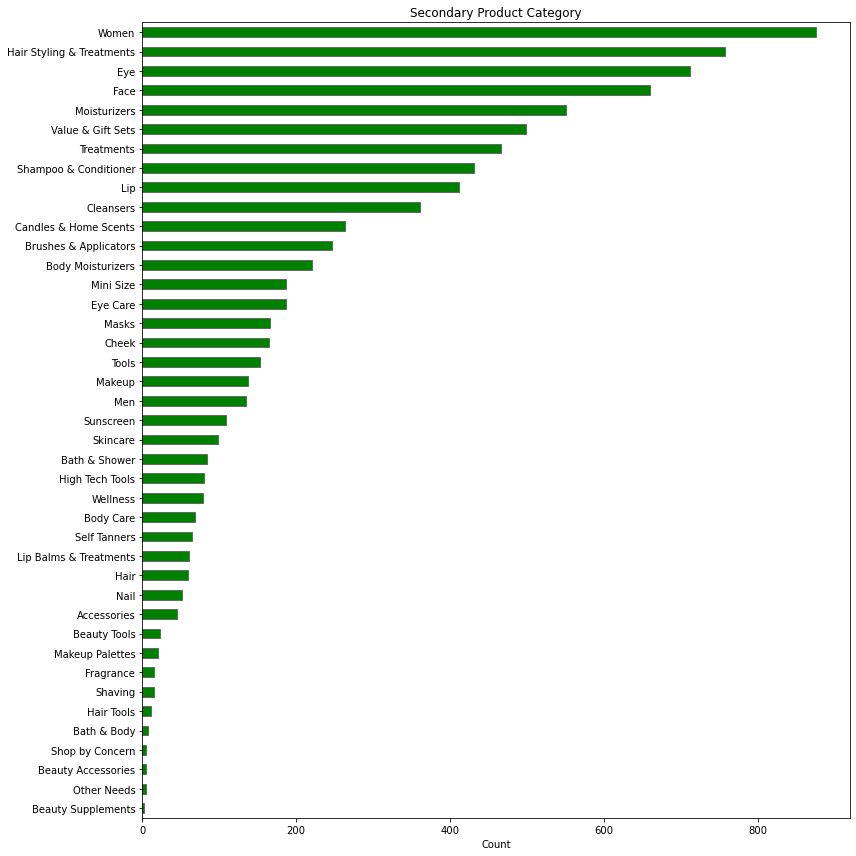

In [181]:
plt.figure(figsize=(12, 12))

data['secondary_category'].value_counts().iloc[::-1].plot(kind='barh', color='green', edgecolor='dimgrey')

plt.title('Secondary Product Category')
plt.xlabel('Count')
plt.tight_layout()
plt.show()